## Data Preparation & EDA

The objective of this project is to design a model to predict chart type, therefore limiting the need for manual classification. From the original Kaggle dataset, we randomly choose 7500 images (2500 per class) for model training and testing.

#### Data Preparation

In [31]:
# import libraries

import random
import os
import json
import numpy as np
import pandas as pd
import shutil
from skimage.io import imread
from numpy import array
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = './assets/original images/'
train_images=os.listdir(train_data)

train_details = './assets/original annotations/'
train_info=os.listdir(train_details)

In [3]:
len(train_images)

60578

In [4]:
graph_id=[]
chart_type=[]
image_height=[]
image_width=[]

for i in range(len(train_images)):
    with open(train_details+train_info[i], 'r') as f:
        data = json.load(f)
    graph_id.append(train_images[i].split('.')[0])
    chart_type.append(data['chart-type'])
    img = imread(train_data+train_images[i])
    image_height.append(img.shape[0])
    image_width.append(img.shape[1])
    
data = {'graph_id': graph_id, 'chart_type': chart_type, 'image_height':image_height, 'image_width':image_width}
graphs = pd.DataFrame(data)

def chart_value(x):
    if x=='vertical_bar':
        y=0
    elif x=='line':
        y=1
    elif x=='scatter':
        y=2
    elif x=='dot':
        y=3
    elif x=='horizontal_bar':
        y=4
    return y

graphs['chart_value']=graphs['chart_type'].map(lambda x: chart_value(x))

graphs

,graph_id,chart_type,image_height,image_width,chart_value
0,0000ae6cbdb1,vertical_bar,281,466,0
1,0003a50817cf,line,480,640,1
2,0005413054c9,line,282,470,1
3,0005e64fdc6e,scatter,347,491,2
4,000614d3eab6,line,550,800,1
...,...,...,...,...,...
60573,fffdafef9db0,line,320,509,1
60574,fffdb0a69d5f,line,307,480,1
60575,fffdc83973fc,dot,290,500,3
60576,fffed04c1d49,line,285,473,1


In [5]:
graphs.to_csv('./data/full dataset.csv',index=False)

In [6]:
graphs=graphs.sort_values(by='chart_value').reset_index(drop=True)

In [50]:
# random select 2500 images from each class for training/validation/testing
random.seed(42)

vbar=random.sample(list(graphs[graphs['chart_value']==0].index), 2500)
vbar_train=random.sample(vbar,2000)
vbar_test=set(vbar).difference(set(vbar_train))

line=random.sample(list(graphs[graphs['chart_value']==1].index), 2500)
line_train=random.sample(line,2000)
line_test=set(line).difference(set(line_train))

scatter=random.sample(list(graphs[graphs['chart_value']==2].index), 2500)
scatter_train=random.sample(scatter,2000)
scatter_test=set(scatter).difference(set(scatter_train))

src_dir='./assets/original images/'

In [14]:
#move original images to train and test folders

vbar_train_images=[graphs.iloc[i,:]['graph_id'] for i in vbar_train]
for file in vbar_train_images:
    shutil.copy(src_dir+file+'.jpg','./assets/project images/train/bar/'+file+'.png')
    
vbar_test_images=[graphs.iloc[i,:]['graph_id'] for i in vbar_test]
for file in vbar_test_images:
    shutil.copy(src_dir+file+'.jpg','./assets/project images/test/bar/'+file+'.png')
      
line_train_images=[graphs.iloc[i,:]['graph_id'] for i in line_train]
for file in line_train_images:
     shutil.copy(src_dir+file+'.jpg','./assets/project images/train/line/'+file+'.png')

line_test_images=[graphs.iloc[i,:]['graph_id'] for i in line_test]
for file in line_test_images:
    shutil.copy(src_dir+file+'.jpg','./assets/project images/test/line/'+file+'.png')

scatter_train_images=[graphs.iloc[i,:]['graph_id'] for i in scatter_train]
for file in scatter_train_images:
    shutil.copy(src_dir+file+'.jpg','./assets/project images/train/scatter/'+file+'.png')

scatter_test_images=[graphs.iloc[i,:]['graph_id'] for i in scatter_test]
for file in scatter_test_images:
    shutil.copy(src_dir+file+'.jpg','./assets/project images/test/scatter/'+file+'.png')

In [17]:
graphs[graphs.index.isin(vbar+line+scatter)].reset_index(drop=True)

,graph_id,chart_type,image_height,image_width,chart_value
0,c80539485b6a,vertical_bar,314,498,0
1,c72ab56084d2,vertical_bar,296,512,0
2,c815bc413a7f,vertical_bar,281,470,0
3,c7ceca90645d,vertical_bar,318,481,0
4,c7bfd9d24906,vertical_bar,268,465,0
...,...,...,...,...,...
7495,7bb61aaf6f0c,scatter,348,501,2
7496,799c0e33bdb9,scatter,310,491,2
7497,7b43c7013ec9,scatter,298,508,2
7498,7989975b5951,scatter,303,493,2


In [18]:
graph_samples=graphs[graphs.index.isin(vbar+line+scatter)].reset_index(drop=True)
graph_samples.to_csv('./data/sample_graphs.csv',index=False)

---

#### EDA

In [40]:
graph_samples.isnull().sum().sum()

0

In [41]:
graph_samples.duplicated().sum()

0

In [42]:
graph_samples.groupby('chart_type')['chart_type'].count()

chart_type
line            2500
scatter         2500
vertical_bar    2500
Name: chart_type, dtype: int64

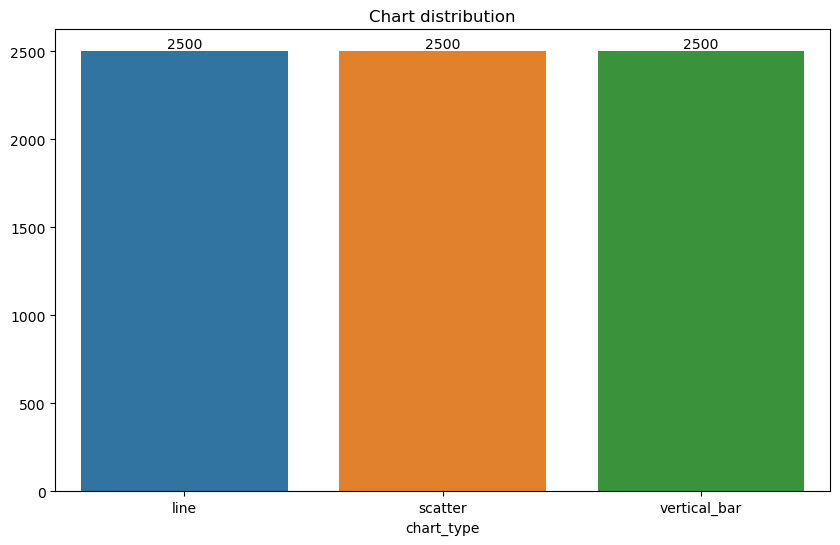

In [43]:
target_counts = graph_samples.groupby('chart_type')['chart_type'].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax=sns.barplot(y=target_counts.values, x=target_counts.index, order=target_counts.index)
plt.title('Chart distribution')
for i in ax.containers:
    ax.bar_label(i,)

In [44]:
graph_samples.describe()

,image_height,image_width,chart_value
count,7500.000000,7500.000000,7500.000000
mean,312.838400,501.814133,1.000000
std,71.164053,75.350051,0.816551
min,147.000000,318.000000,0.000000
25%,277.750000,469.000000,0.000000
50%,290.000000,487.000000,1.000000
75%,313.000000,502.000000,2.000000
max,880.000000,1280.000000,2.000000


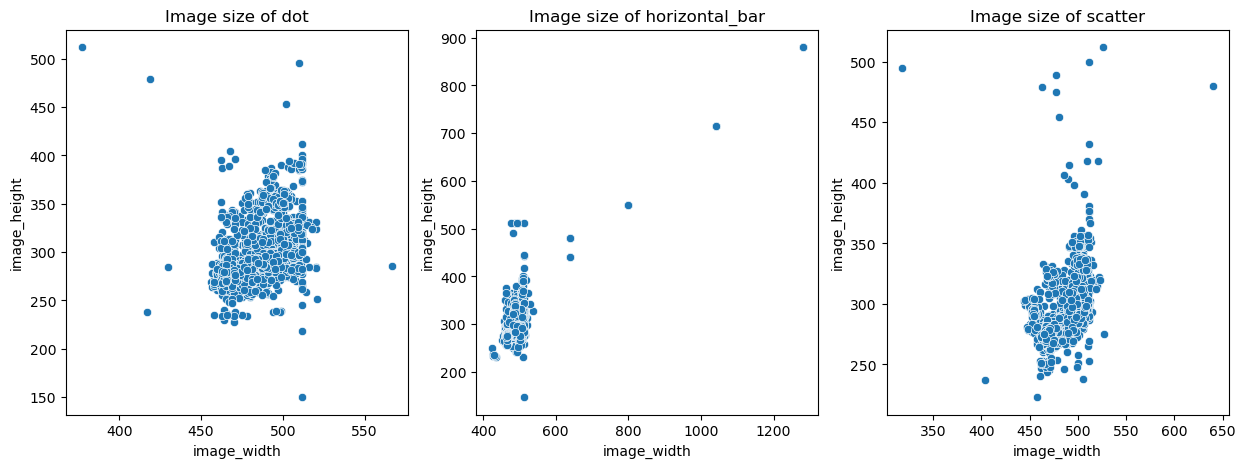

In [45]:
#checking for correlation between image width and height

k=0
fig,axes=plt.subplots(1,3,figsize=(15,5))
for i in list(graphs['chart_type'].unique()):
    sns.scatterplot(data=graph_samples[graph_samples['chart_type']==i],x='image_width',y='image_height',ax=axes[k%3])
    axes[k%3].set_title(f'Image size of {i}')
    k+=1
plt.show()

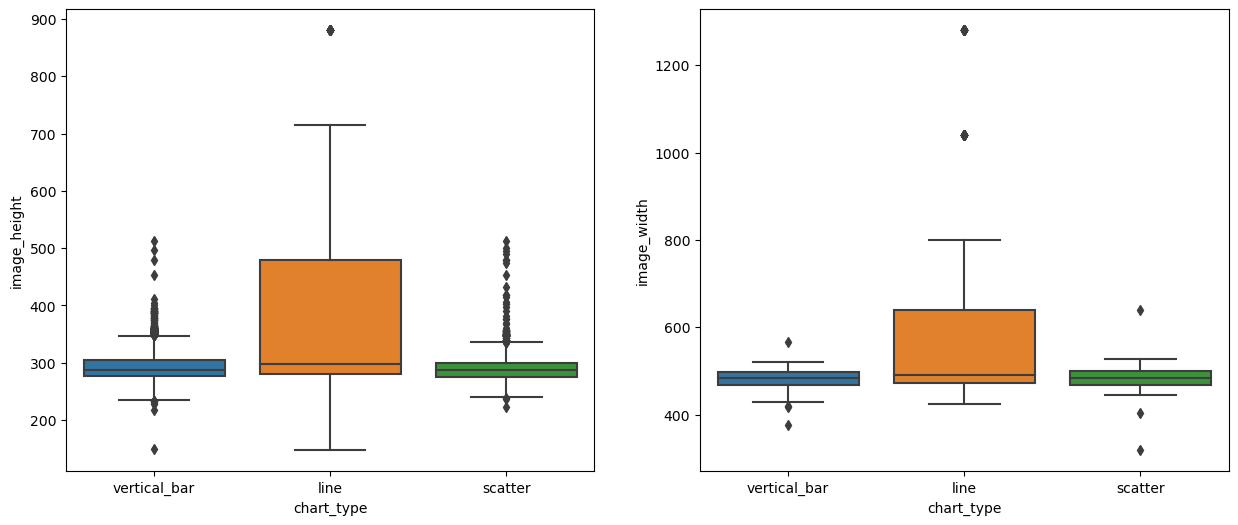

In [46]:
# checking image width and height

fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(data=graph_samples, y='image_height', x='chart_type',ax=axes[0])
sns.boxplot(data=graph_samples, y='image_width', x='chart_type',ax=axes[1])
plt.show()

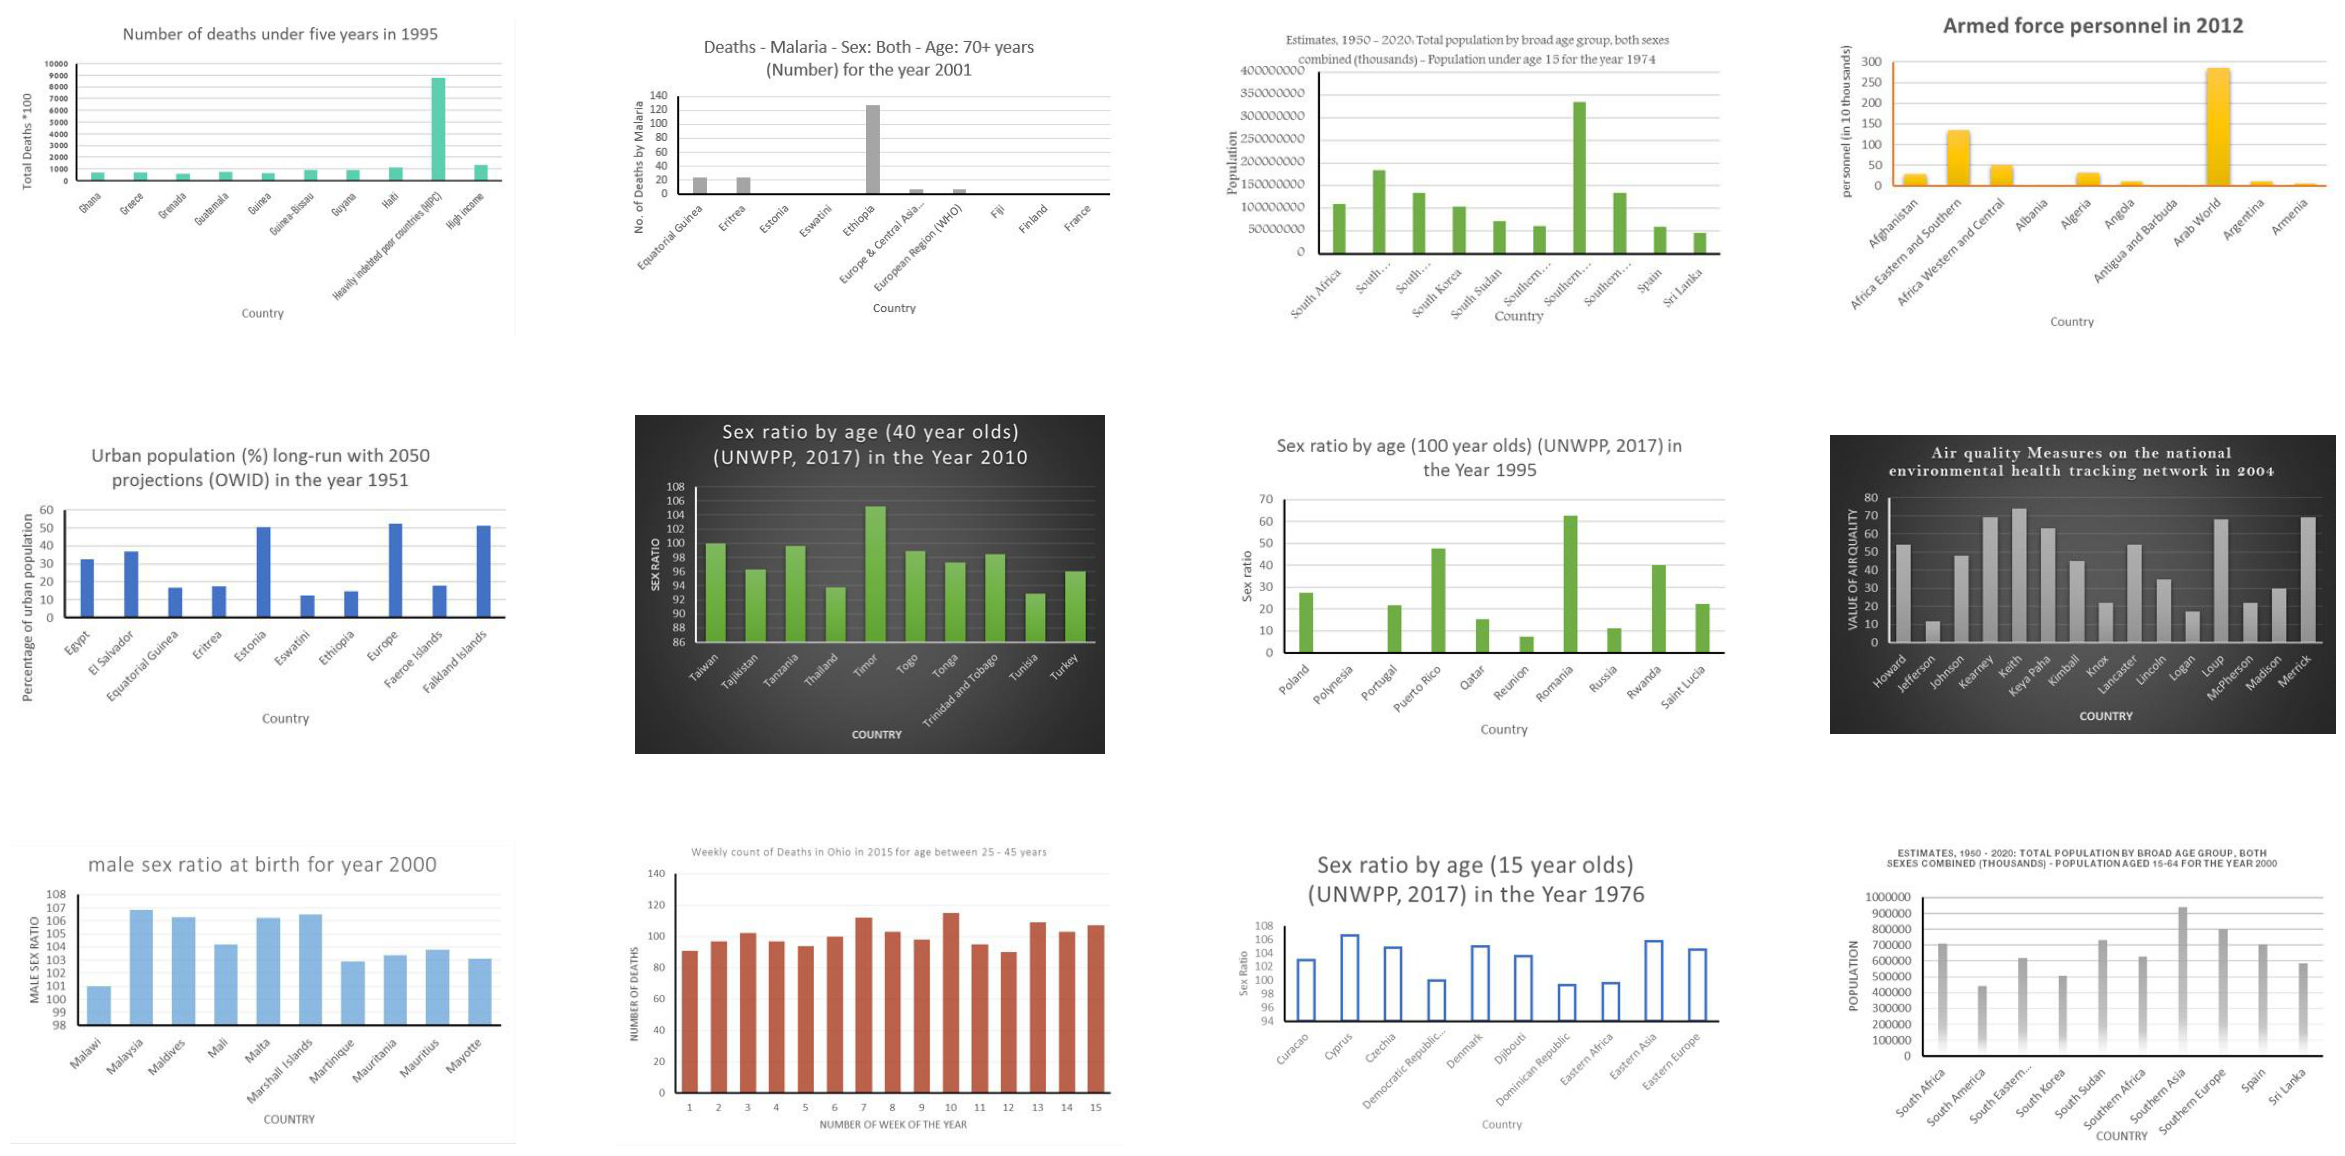

In [47]:
# bar graph samples

plt.rcParams["figure.figsize"] = [7.50, 3.50]
data_path = [os.path.join("./original images/" + i + '.jpg') for i in graph_samples[graph_samples['chart_value']==0].head(12)['graph_id']]
plt.rcParams["figure.figsize"] = [30, 15]
rows = 3
columns = 4
k=0

for i in data_path:
    k=k+1
    fig.add_subplot(rows, columns, 1)
    plt.subplot(3,4,k) 
    plt.imshow(array(Image.open(i)))
    plt.axis('off')

plt.show()

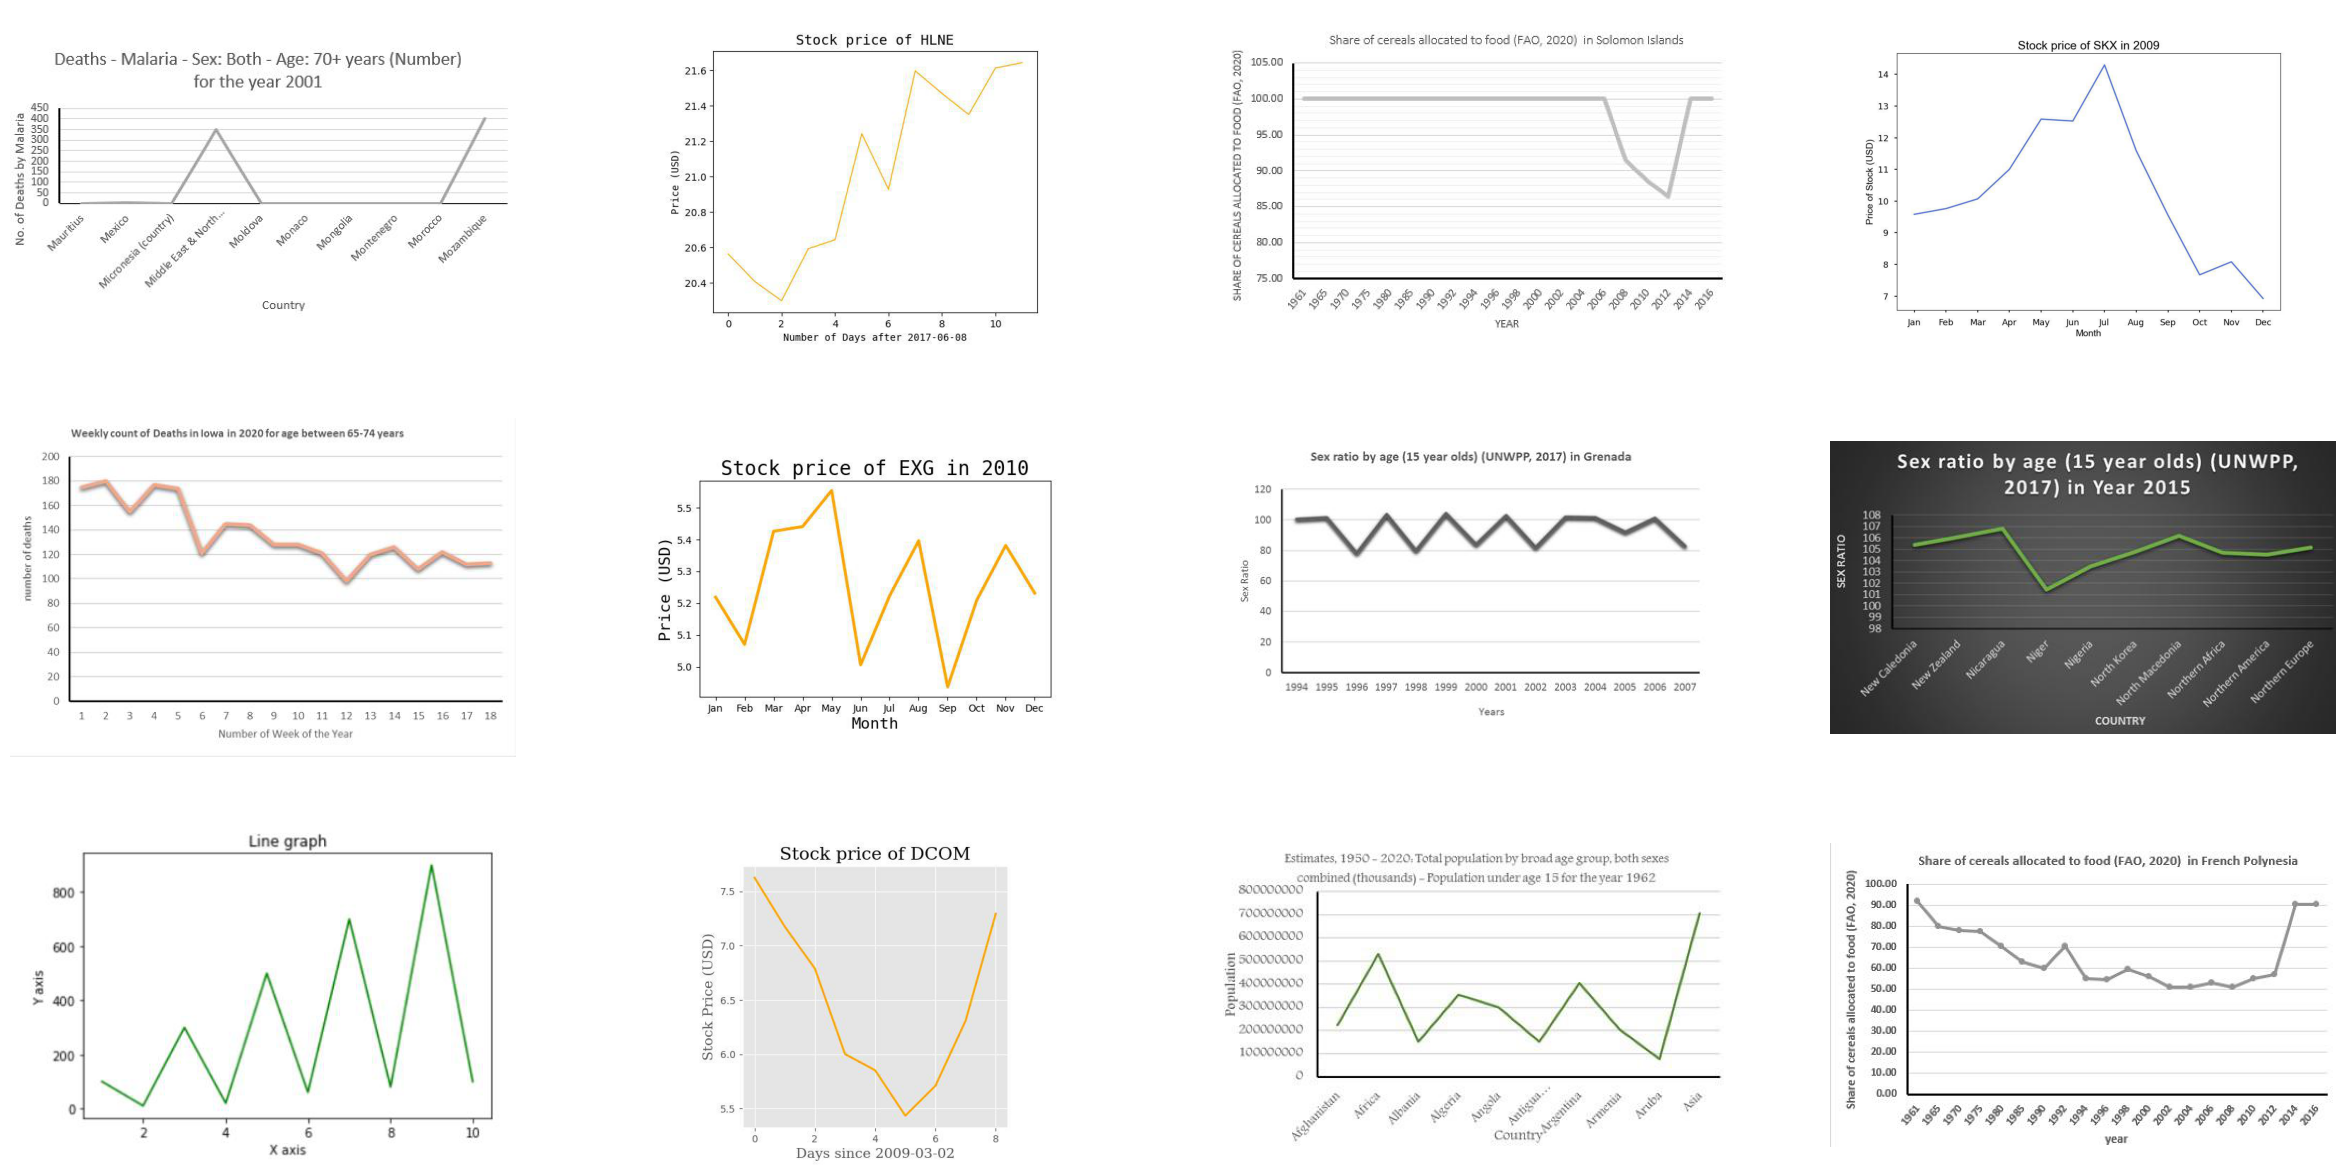

In [48]:
# line graph samples

plt.rcParams["figure.figsize"] = [7.50, 3.50]
data_path = [os.path.join("./original images/" + i + '.jpg') for i in graph_samples[graph_samples['chart_value']==1].head(12)['graph_id']]
plt.rcParams["figure.figsize"] = [30, 15]
rows = 3
columns = 4
k=0

for i in data_path:
    k=k+1
    fig.add_subplot(rows, columns, 1)
    plt.subplot(3,4,k) 
    plt.imshow(array(Image.open(i)))
    plt.axis('off')

plt.show()

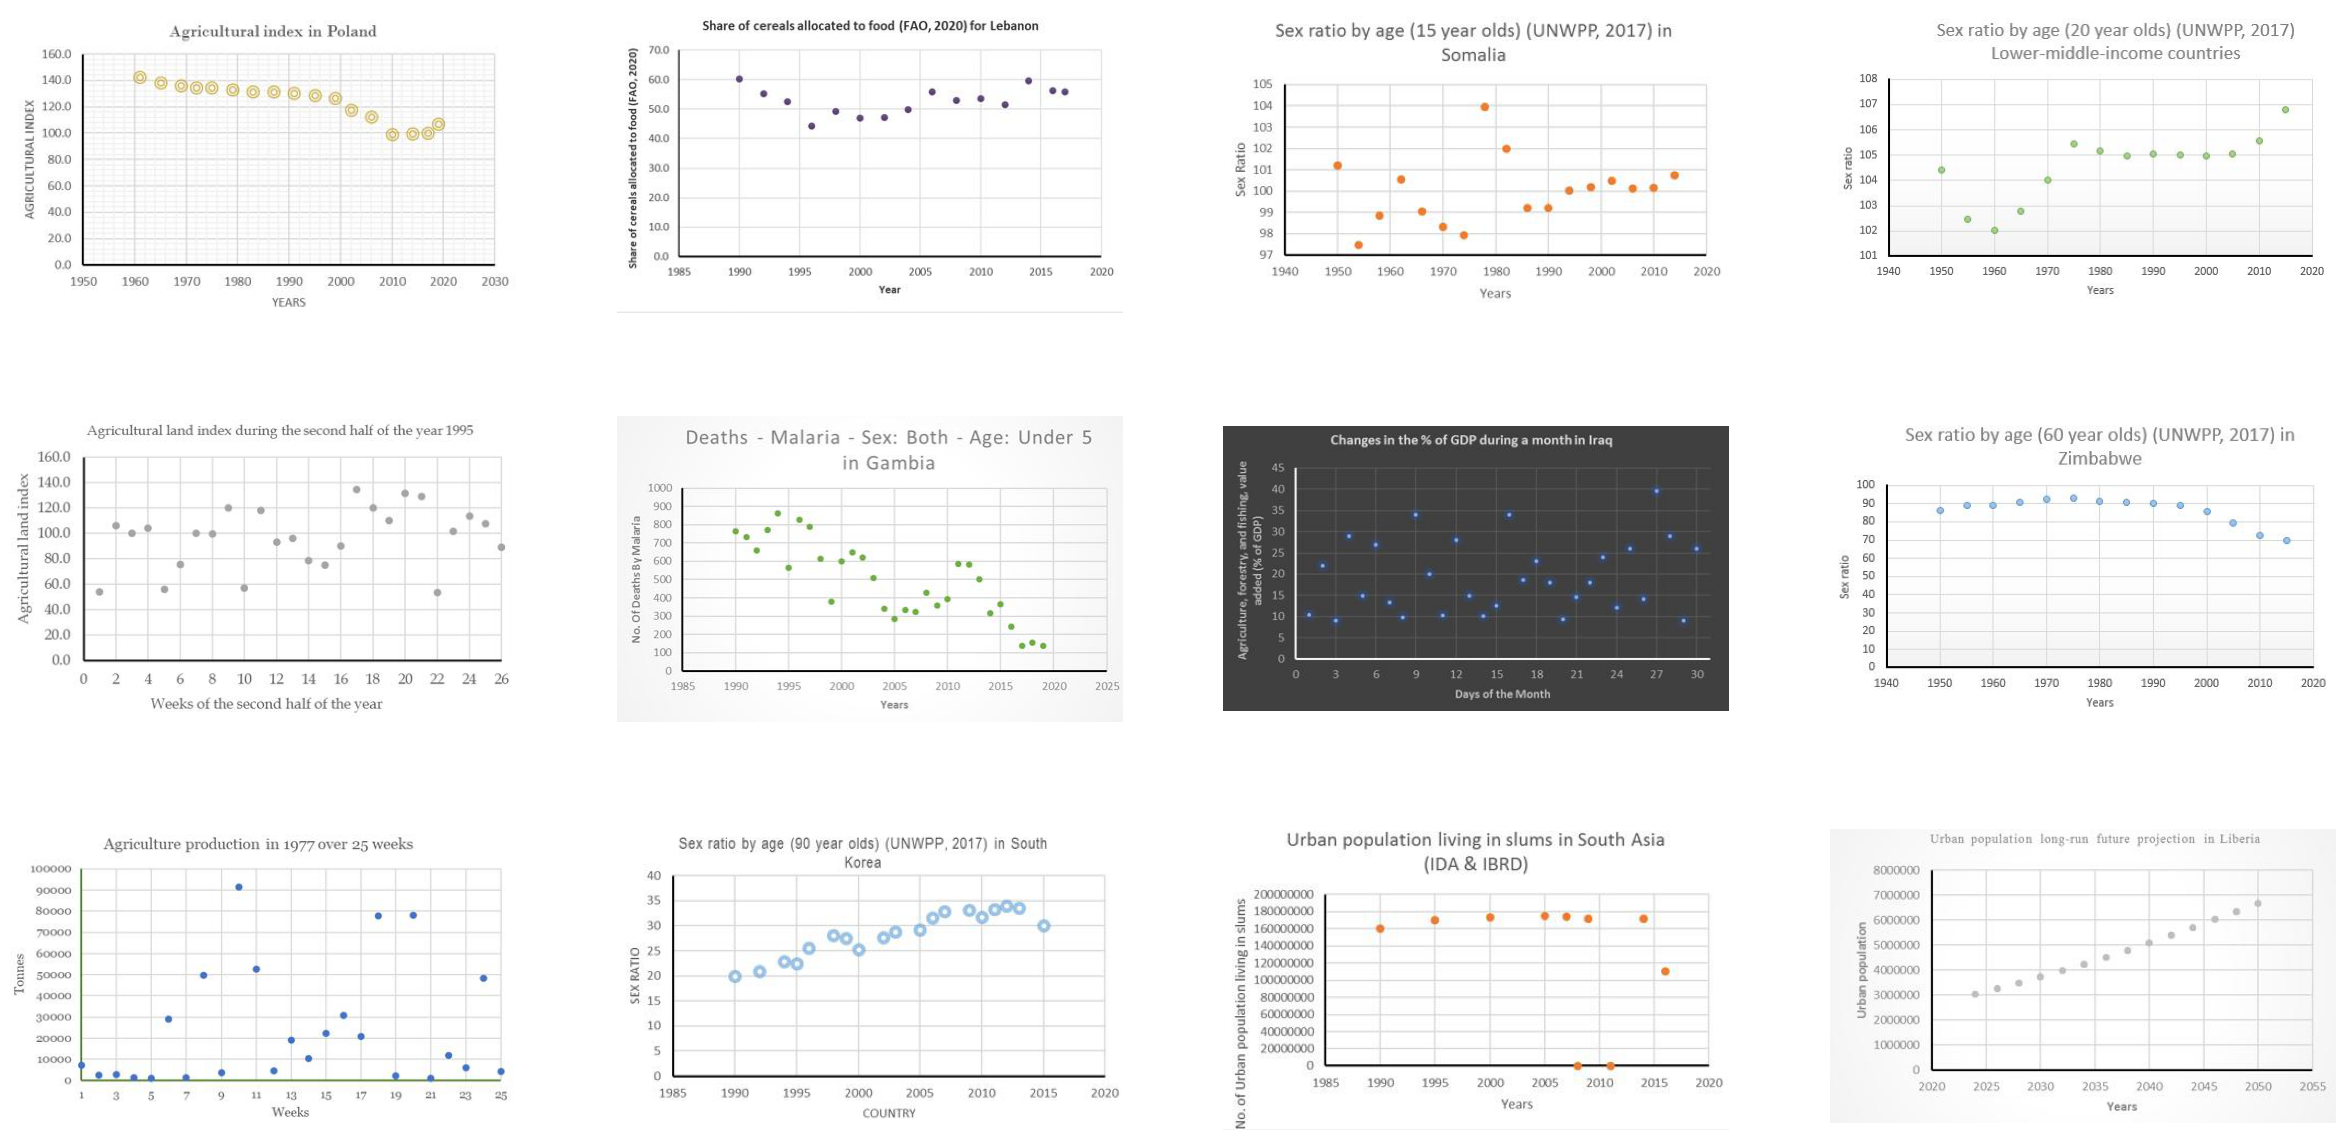

In [49]:
# scatter plot samples

plt.rcParams["figure.figsize"] = [7.50, 3.50]
data_path = [os.path.join("./original images/" + i + '.jpg') for i in graph_samples[graph_samples['chart_value']==2].head(12)['graph_id']]
plt.rcParams["figure.figsize"] = [30, 15]
rows = 3
columns = 4
k=0

for i in data_path:
    k=k+1
    fig.add_subplot(rows, columns, 1)
    plt.subplot(3,4,k) 
    plt.imshow(array(Image.open(i)))
    plt.axis('off')

plt.show()